In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import the libraries

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score,RocCurveDisplay,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
# Check for Missing values , No missing value found
df.isna().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# 2.1.1 EDA
# A .Imbalanced Distribution of Target variable

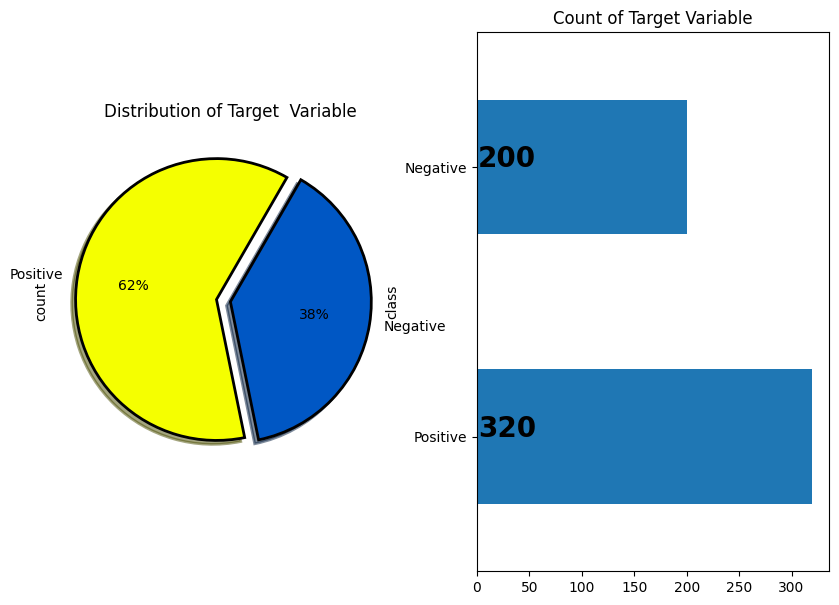

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  Variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Target Variable")
plt.show()

# B .Gender Distribution on Positive Class

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


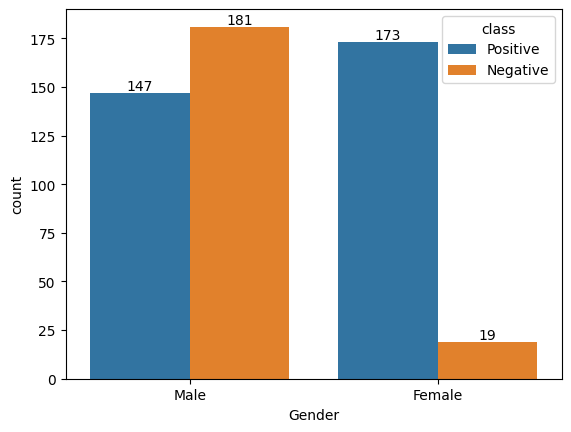

In [ ]:
ax=sns.countplot(df, x="Gender",hue='class')

for container in ax.containers:
    ax.bar_label(container)

plot_criteria= ['Gender', 'class']

cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

# C.Chi-Square Test

In [ ]:
#Map 'positive' to 1 and 'negative' to 0
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head()

# drop class column
X = df.drop(['class'], axis=1)
y = df['class']

# Storing Features
objectList = X.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [ ]:
# Label Encoding for object to numeric conversion

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = X[feature].astype('category').cat.codes

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int8 
 2   Polyuria            520 non-null    int8 
 3   Polydipsia          520 non-null    int8 
 4   sudden weight loss  520 non-null    int8 
 5   weakness            520 non-null    int8 
 6   Polyphagia          520 non-null    int8 
 7   Genital thrush      520 non-null    int8 
 8   visual blurring     520 non-null    int8 
 9   Itching             520 non-null    int8 
 10  Irritability        520 non-null    int8 
 11  delayed healing     520 non-null    int8 
 12  partial paresis     520 non-null    int8 
 13  muscle stiffness    520 non-null    int8 
 14  Alopecia            520 non-null    int8 
 15  Obesity             520 non-null    int8 
dtypes: int64(1), int8(15)
memory usage: 11.8 KB


In [ ]:
from scipy.stats import chi2_contingency

# Initialize DataFrame to store Chi-Square statistics or p-values
chi2_stats = pd.DataFrame(index=objectList, columns=['Chi2 Stat', 'P-value'])

# Perform Chi-Square test for each categorical feature
for feature in X.columns:
    # Create contingency table
    contingency_table = pd.crosstab(X[feature], y)

    # Perform Chi-Square test
    chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)

    # Store results
    chi2_stats.loc[feature, 'Chi2 Stat'] = chi2_stat
    chi2_stats.loc[feature, 'P-value'] = p_value

In [ ]:
corr_plot=X.corrwith(y)
print(corr_plot)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64


In [ ]:
# Convert to DataFrame for heatmap
corr_df = pd.DataFrame(corr_plot, columns=['Correlation'])

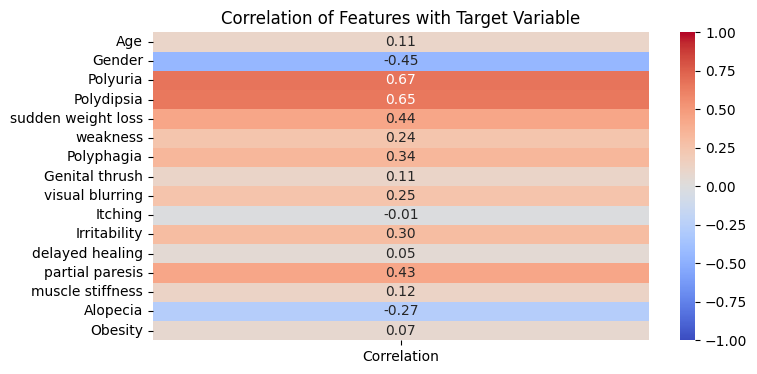

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation of Features with Target Variable')
plt.show()

In [ ]:
# Ensure data is numeric
chi2_stats['Chi2 Stat'] = pd.to_numeric(chi2_stats['Chi2 Stat'], errors='coerce')
chi2_stats['P-value'] = pd.to_numeric(chi2_stats['P-value'], errors='coerce')

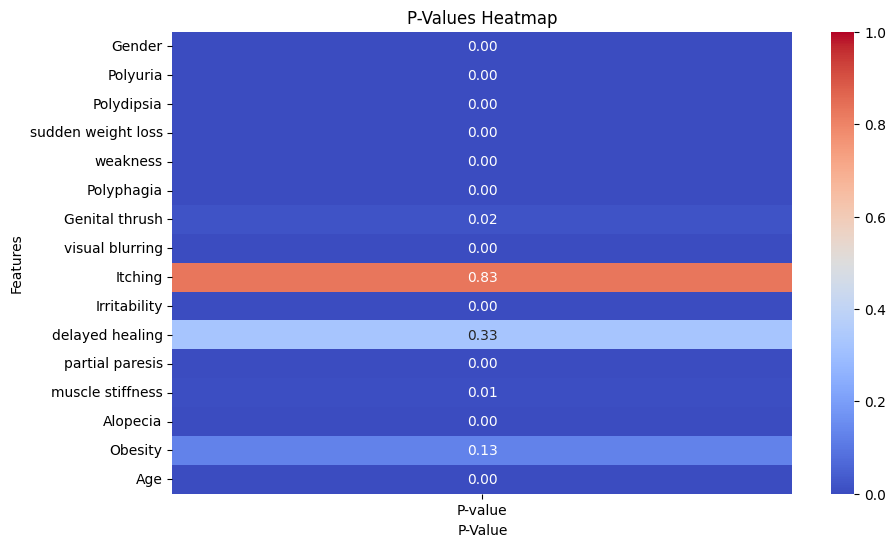

In [ ]:
# Plot heatmap for P-values
plt.figure(figsize=(10, 6))
sns.heatmap(chi2_stats[['P-value']], annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
plt.title('P-Values Heatmap')
plt.xlabel('P-Value')
plt.ylabel('Features')
plt.show()

# D.Outlier detection

In [ ]:
!pip install --upgrade pypalettes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pypalettes: filename=pypalettes-0.1.3-py3-none-any.whl size=370966 sha256=4c8ee196bab76484366c39e4d9afc755175035532af17d9579f45fe288ff2613
  Stored in directory: /root/.cache/pip/wheels/fc/83/46/e3ee129913705de56292a4210f699d8252e2a790e432d35555
Successfully built pypalettes


<ipython-input-27-5eb1dfe04bc8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='class', y='Age', data=df, palette='Set2')


37.0
55.0
39.0
57.0


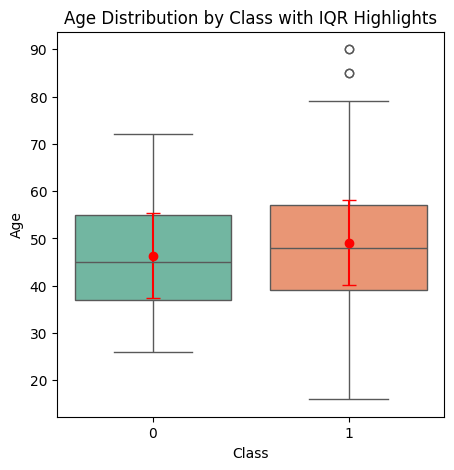

In [ ]:
from pypalettes import get_hex
age_stats = df.groupby('class')['Age'].describe()
age_stats['IQR'] = age_stats['75%'] - age_stats['25%']

# Create a boxplot
plt.figure(figsize=(5, 5))
boxplot = sns.boxplot(x='class', y='Age', data=df, palette='Set2')

# Overlay IQR with error bars
for i, class_label in enumerate(age_stats.index):
    q1 = df[df['class'] == class_label]['Age'].quantile(0.25)
    q3 = df[df['class'] == class_label]['Age'].quantile(0.75)
    print(q1)
    print(q3)
    iqr = q3 - q1
    plt.errorbar(x=i, y=age_stats.loc[class_label, 'mean'],
                 yerr=iqr / 2, fmt='o', color='red', capsize=5)


plt.title('Age Distribution by Class with IQR Highlights')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

Text(0.5, 1.0, 'Histogram and KDE of Age by Class')

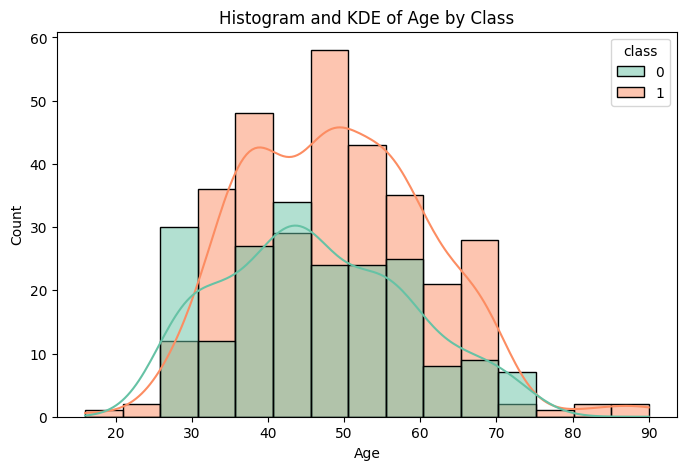

In [ ]:
# Histogram with KDE overlay
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='class', kde=True, palette='Set2', bins=15)
plt.title('Histogram and KDE of Age by Class')

In [ ]:
## Test PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_1 = df.drop(['class'], axis=1)
y_1 = df['class']

In [ ]:
# Label Encoding for object to numeric conversion

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X_1[feature] = X_1[feature].astype('category').cat.codes

print (X_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int8 
 2   Polyuria            520 non-null    int8 
 3   Polydipsia          520 non-null    int8 
 4   sudden weight loss  520 non-null    int8 
 5   weakness            520 non-null    int8 
 6   Polyphagia          520 non-null    int8 
 7   Genital thrush      520 non-null    int8 
 8   visual blurring     520 non-null    int8 
 9   Itching             520 non-null    int8 
 10  Irritability        520 non-null    int8 
 11  delayed healing     520 non-null    int8 
 12  partial paresis     520 non-null    int8 
 13  muscle stiffness    520 non-null    int8 
 14  Alopecia            520 non-null    int8 
 15  Obesity             520 non-null    int8 
dtypes: int64(1), int8(15)
memory usage: 11.8 KB


In [ ]:
# Data Scaling
x_1scaled = StandardScaler().fit_transform(X_1)

In [ ]:
# Reduce from 16 to 5 features with PCA
pca = PCA(n_components=5)

In [ ]:
# Fit and transform data
pca_features = pca.fit_transform(x_1scaled)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

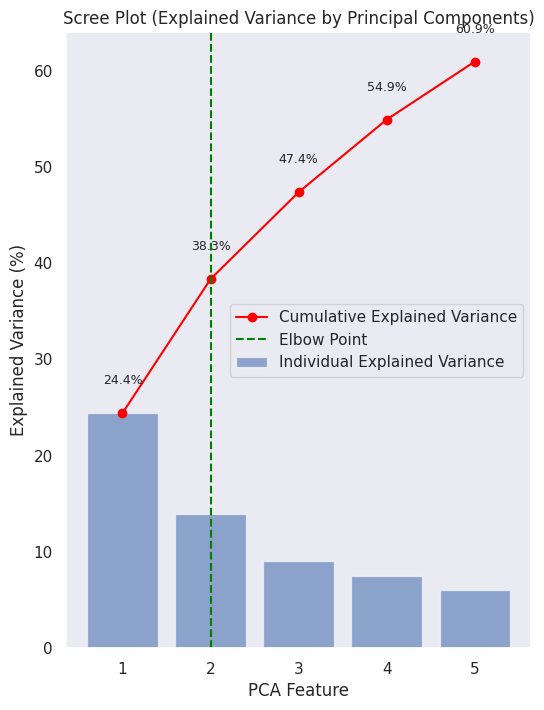

In [ ]:
# Bar plot of explained_variance
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100

# Sort explained variance and ratios in descending order
sorted_indices = np.argsort(explained_variance_ratio)[::-1]  # Indices for sorting in descending order
sorted_explained_variance = explained_variance_ratio[sorted_indices]
sorted_cumulative_variance = np.cumsum(sorted_explained_variance)

# Create a scree plot
plt.figure(figsize=(6, 8))
plt.bar(range(1, len(sorted_explained_variance) + 1), sorted_explained_variance, alpha=0.6, color='b', label='Individual Explained Variance')

# Plot cumulative explained variance
plt.plot(range(1, len(sorted_explained_variance) + 1), sorted_cumulative_variance, color='red', marker='o', label='Cumulative Explained Variance')

# Annotate each cumulative point with its percentage
for i, cum_var in enumerate(sorted_cumulative_variance):
    plt.annotate(f'{cum_var:.1f}%',
                 xy=(i + 1, cum_var),
                 xytext=(i + 1, cum_var + 3),  # Adjust vertical position as needed
                 ha='center',
                 fontsize=9)




# Mark the elbow point (adjust this index based on your analysis)
elbow_index = 2 # Adjust based on where you visually determine the elbow is
plt.axvline(x=elbow_index, color='green', linestyle='--', label='Elbow Point')

# Labels and title
plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot (Explained Variance by Principal Components)')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()

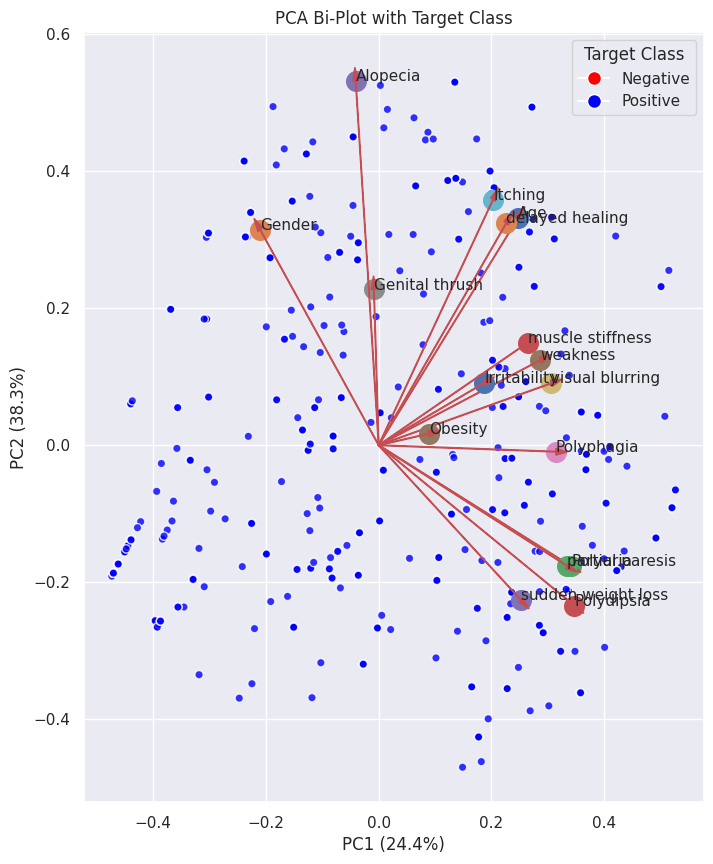

In [ ]:
# Create a figure for the scatter plot
plt.figure(figsize=(8, 10))
# Use scatter plot to include target class
scatter = plt.scatter(
    pca_df_scaled['PC1'],
    pca_df_scaled['PC2'],
    c=y_1.map({0: 'red', 1: 'blue'}),  # Map classes to colors
    alpha=0.8,
    edgecolor='w'
)


for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r',
        head_width=0.01,
        head_length=0.02
        )
    plt.text(xs[i], ys[i], varnames,fontsize=11)


xticks = np.linspace(-0.8, 0.8, num=8)
yticks = np.linspace(-0.8, 0.8, num=8)

# Create a custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='blue', markersize=10)
]
plt.legend(handles=handles, title='Target Class')


plt.xlabel('PC1 (24.4%)')
plt.ylabel('PC2 (38.3%)')
plt.title('PCA Bi-Plot with Target Class')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2,random_state=0,stratify=y)

# 2.1.2 RF Feature Selection

In [ ]:
# Train RandomForest Classifier
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
# Duplicate a new df
df_1 = df.copy()

In [ ]:
# Create a new column with mapped numerical values using map
mapping = {'Positive': 1, 'Negative': 0}
df_1['class_num'] = df_1['class'].map(mapping)

In [ ]:
# Define feature columns (exclude the target variable 'class_num')
feature_columns = X.columns[X.columns != 'class_num']
X = df_1[feature_columns]  # Features for training
y = df_1['class_num']      # Target variable

Feature importances:
 1) Polydipsia                     0.203726
 2) Polyuria                       0.189933
 3) Gender                         0.118363
 4) Age                            0.085140
 5) sudden weight loss             0.058096
 6) partial paresis                0.048659
 7) Alopecia                       0.043048
 8) Irritability                   0.037399
 9) delayed healing                0.035307
10) Polyphagia                     0.032782
11) visual blurring                0.030662
12) Itching                        0.030023
13) weakness                       0.024643
14) muscle stiffness               0.024508
15) Genital thrush                 0.020536
16) Obesity                        0.017174


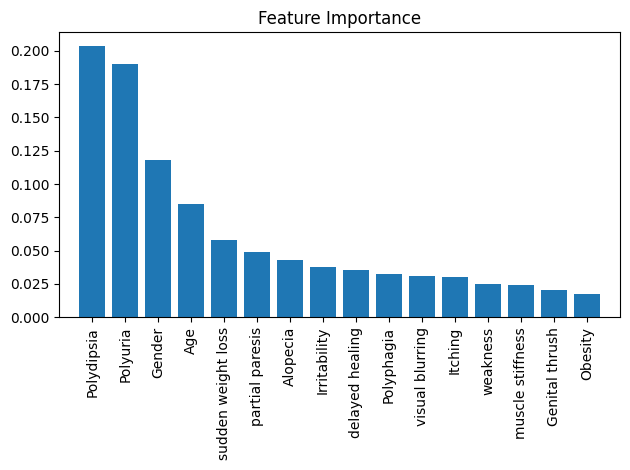

In [ ]:
# Feature importances
importances = forest.feature_importances_
# Feature labels
feat_labels = feature_columns
# Sort the feature importances in descending order and get indices
indices = np.argsort(importances)[::-1]

# Print the feature importances
print("Feature importances:")
for f in range(X_train.shape[1]):
    print(f"{f + 1:2d}) {feat_labels[indices[f]]:<30} {importances[indices[f]]:.6f}")

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),
feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# 2.2 Predicitve Model Construction


In [ ]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,StratifiedKFold,GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score,
                             recall_score, f1_score, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report, roc_curve,make_scorer,roc_auc_score)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Applying SMOTE

In [ ]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('After',counter)

After Counter({1: 256, 0: 256})


In [ ]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()
Sensitivity =list()
Specificity = list()

In [ ]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):

    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    precision_val = precision_score(y_test, y_pred)
    recall_val = recall_score(y_test, y_pred)
    f1score_val = f1_score(y_test, y_pred)
    aucroc_val = roc_auc_score(y_test, y_prob[:,1])
    sensitivity_val = recall_val
    specificity_val = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print metrics
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    print('='*60)
    print('Sensitivity (Recall)')
    print('=' * 60)
    print(sensitivity_val)
    print('=' * 60)
    print('Specificity')
    print('=' * 60)
    print(specificity_val)


    # Append metrics to lists
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)
    Sensitivity.append(sensitivity_val)
    Specificity.append(specificity_val)

 # Model 1 : Random Forest

In [ ]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]
# Including both Gini impurity and Entropy
criteria = ['gini', 'entropy']

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)


clf_r = RandomForestClassifier(random_state=42)

# Define the parameter grid
rf_params = {
    'n_estimators': estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criteria  # Add criterion to the hyperparameter grid
}

In [ ]:
## Fitting the RF model
clf_RF = RandomizedSearchCV(clf_r, rf_params, cv=cv, scoring='accuracy', n_jobs=-1, n_iter=10, verbose=2)
clf_RF.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 11, 13, 15],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 100],
                                        'n_estimators': [2, 10, 30, 50, 100]},
                   scoring='accuracy', verbose=2)

In [ ]:
RF_SMOTE= clf_RF.best_estimator_

In [ ]:
#RF Evaluating the Model (After SMOTE):
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[36  4]
 [ 3 61]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.94      0.95      0.95        64

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104
 

AUC-ROC
0.9921875
Sensitivity (Recall)
0.953125
Specificity
0.9


# Model 2 : Logistic Regression

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train_lr = Scaler_X.fit_transform(X_train)
X_test_lr = Scaler_X.transform(X_test)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='accuracy', n_jobs=-1)

In [ ]:
# Fit the LR model
clf_LR.fit(X_train_sm, y_train_sm)
LR_SMOTE=clf_LR.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

In [ ]:
#LR Evaluating the Model (After SMOTE):
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[35  5]
 [ 5 59]] 

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.92      0.92      0.92        64

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.90      0.90      0.90       104
 

AUC-ROC
0.9652343750000001
Sensitivity (Recall)
0.921875
Specificity
0.875


# Model 3 : SVC

In [ ]:
# #Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)
X_train_SVM = sc.transform(X_train)
X_test_SVM = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from imblearn.pipeline import Pipeline
from scipy.stats import randint, uniform
from imblearn.over_sampling import SVMSMOTE

In [ ]:
# Initialize SVMSMOTE with the current k value
svm_smote = SVMSMOTE(k_neighbors=5, random_state=42)
svm_model = SVC(probability=True, random_state=42)
# Create a pipeline
pipeline = Pipeline([
    ('svmsmote', svm_smote),
    ('svc', svm_model)
])
# Resample the SVC model
X_train_SVM, y_train_SVM = svm_smote.fit_resample(X_train, y_train)

# Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Set up RandomizedSearchCV to find the best hyperparameters
param_grid = {
    'svc__C': [1, 10, 100, 1000],
    'svc__gamma': [1, 0.1, 0.001, 0.0001],
    'svc__kernel': ['linear', 'rbf']
}

In [ ]:
# Set up RandomizedSearchCV to find the best hyperparameters
clf_svm = RandomizedSearchCV(pipeline, param_distributions=param_grid,
                                    n_iter=10, cv=cv, scoring='accuracy',
                                    n_jobs=-1, verbose=2, random_state=42)

clf_svm.fit(X_train_SVM, y_train_SVM)
SVM_SMOTE=clf_svm.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#SVC Evaluating the Model (After SMOTE):
test_eval(clf_svm, X_test, y_test, 'SVC', 'smote')

Confusion Matrix
[[39  1]
 [ 5 59]] 

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104
 

AUC-ROC
0.975
Sensitivity (Recall)
0.921875
Specificity
0.975


# ROC Curve

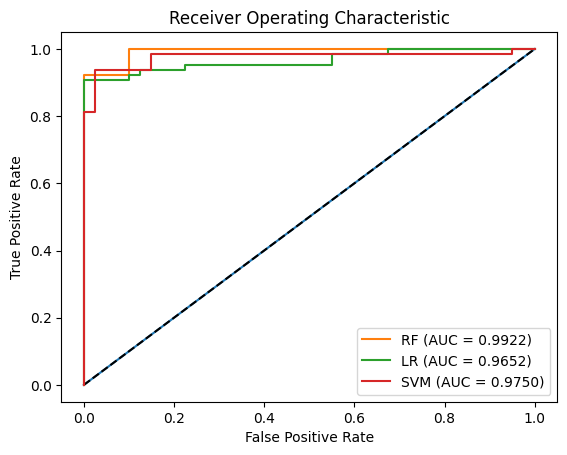

In [ ]:
# Model 1 : RF
y_pre_prob_1 = RF_SMOTE.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pre_prob_1)
auc1 = roc_auc_score(y_test, y_pre_prob_1)

# Model 2 : LR

y_pre_prob_2=LR_SMOTE.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pre_prob_2)
auc2 = roc_auc_score(y_test, y_pre_prob_2)

# Model 3 : SVM

y_pre_prob_3=SVM_SMOTE.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pre_prob_3)
auc3 = roc_auc_score(y_test, y_pre_prob_3)

plt.plot([0, 1], [0, 1], [0,1],'k--')
plt.plot(fpr1, tpr1, label="RF (AUC = %0.4f)" % auc1)
plt.plot(fpr2, tpr2, label="LR (AUC = %0.4f)" % auc2)
plt.plot(fpr3, tpr3, label="SVM (AUC = %0.4f)" % auc3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# 3.1 XAI - SHAP

In [ ]:
! pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
# Create a Random Forest Classifier
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_class.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Create a KernelExplainer
explainer = shap.KernelExplainer(rf_class.predict, X_train)

# Explain the prediction using the KernelExplainer
shap_values = explainer.shap_values(X_test)

  0%|          | 0/104 [00:00<?, ?it/s]

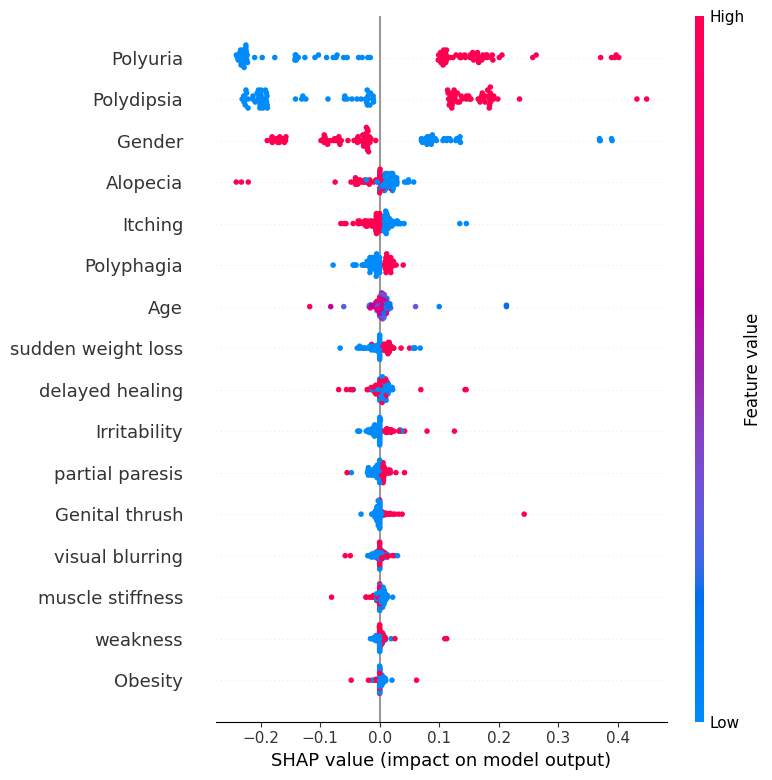

In [ ]:
# Plot the summary plot
shap.summary_plot(shap_values, X_test, show=False, feature_names=X.columns)
plt.show()

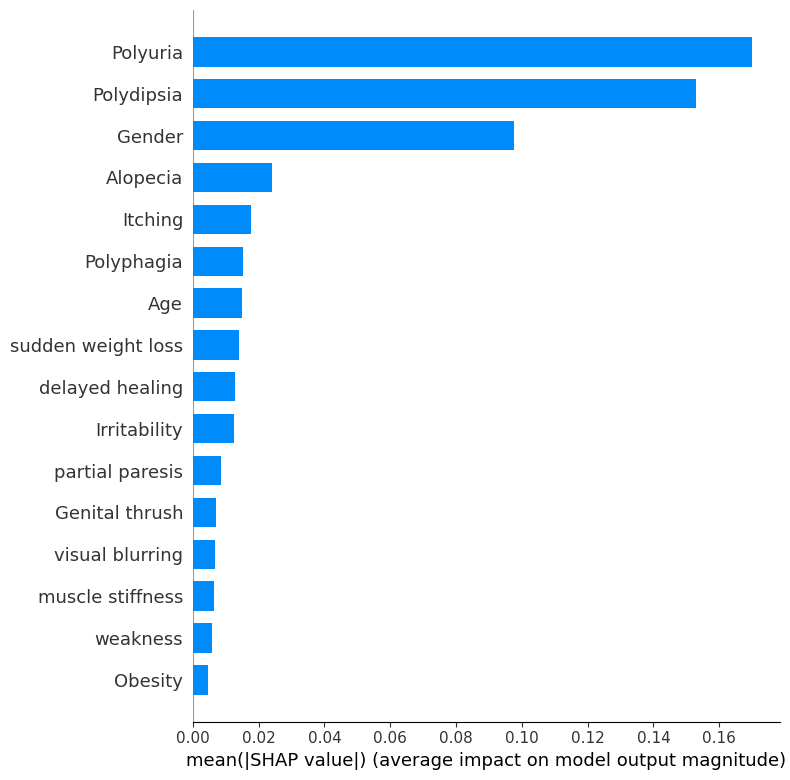

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# Tree Explainer
explainer = shap.TreeExplainer(rf_class)
shap_values = explainer(X_test)

In [ ]:
# Define the index for the instance you want to visualize
instance_index = 1  # Change this to the desired index

In [ ]:
# Extract the SHAP values for the specified instance
instance_shap_values = shap_values.values[instance_index]
instance_expected_value = explainer.expected_value

In [ ]:
for i in range(start_index, end_index):
    # Extract the SHAP values for the i-th instance
    instance_shap_values = shap_values.values[i]
    instance_expected_value = explainer.expected_value

In [ ]:
class_index = 1
shap_values_for_class = instance_shap_values[:, class_index]

In [ ]:
# Single Instance
shap.initjs()

shap.plots.force(
    shap.Explanation(
        values=shap_values_for_class,
        base_values=instance_expected_value[class_index],
        data=X_test.iloc[instance_index],
        feature_names=X_test.columns
    )
)

# XAI - LIME

In [ ]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=19793347d411ec9ec4d5d66dcb9a297a2f5c6e143723c4aa159d6fb948ef0fad
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
from lime import lime_text
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns,mode='classification')

In [ ]:
exp = explainer.explain_instance(X_test.iloc[1],rf_class.predict_proba)
exp.show_in_notebook(show_all=True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.